# Week 1

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Settings
plt.style.use('seaborn-v0_8')
sns.set(rc={'figure.figsize': (12, 6)})

In [3]:
df = pd.read_csv('city_hour.csv')
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset Shape: (707875, 16)
Columns: ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


### Basic Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [5]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,562787.0,67.622994,74.730496,0.01,26.20,46.42,79.49,999.99
PM10,411138.0,119.075804,104.224752,0.01,52.38,91.50,147.52,1000.00
NO,591243.0,17.421755,32.095211,0.01,3.84,7.96,16.15,499.99
NO2,590753.0,28.885157,29.162194,0.01,10.81,20.32,36.35,499.51
NOx,584651.0,32.287565,39.756669,0.00,10.66,20.79,37.15,498.61
NH3,435333.0,23.607959,28.831900,0.01,8.12,15.38,29.23,499.97
CO,621358.0,2.183539,10.970514,0.00,0.42,0.80,1.37,498.57
SO2,577502.0,14.038307,19.305540,0.01,4.88,8.37,14.78,199.96
O3,578667.0,34.798979,29.806379,0.01,13.42,26.24,47.62,497.62
Benzene,544229.0,3.087595,16.456599,0.00,0.05,0.86,2.75,498.07


In [7]:
# Drop rows with invalid datetime
if "Datetime" in df.columns:
    df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")
else:
    raise KeyError("❌ 'Datetime' column not found in dataset!")

In [8]:
# Drop rows with completely invalid datetime
df = df.dropna(subset=["Datetime"])

In [9]:
# Sort data for time-series analysis
df = df.sort_values(by=['City','Datetime']).reset_index(drop=True)

In [10]:
# Handle unrealistic sensor values (cap readings: 500, 999, 1000)
for col in ["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]:
    df[col] = df[col].mask(df[col] > 500, np.nan)   
df["PM10"] = df["PM10"].mask(df["PM10"] > 1000, np.nan)  
df["AQI"] = df["AQI"].mask(df["AQI"] > 1000, np.nan)    


In [11]:
# Interpolate missing values by city (time-based)

def safe_interpolate(group):
    group = group.set_index("Datetime").sort_index()
    
    # Check if index is datetime type
    if pd.api.types.is_datetime64_any_dtype(group.index):
        return group.interpolate(method="time")
    else:
        return group.interpolate()  # fallback to numeric interpolation

df = (
    df.groupby("City", group_keys=False)
      .apply(safe_interpolate)
      .reset_index()
)


In [12]:
# If any NaNs still remain, forward/backward fill
df = df.fillna(method="ffill").fillna(method="bfill")

# Drop duplicates if any
df = df.drop_duplicates()

In [13]:
print("After cleaning, dataset shape:", df.shape)

After cleaning, dataset shape: (707875, 16)


In [14]:
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Datetime      0
City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


# Exploratory Data Analysis

##### AQI Distribution

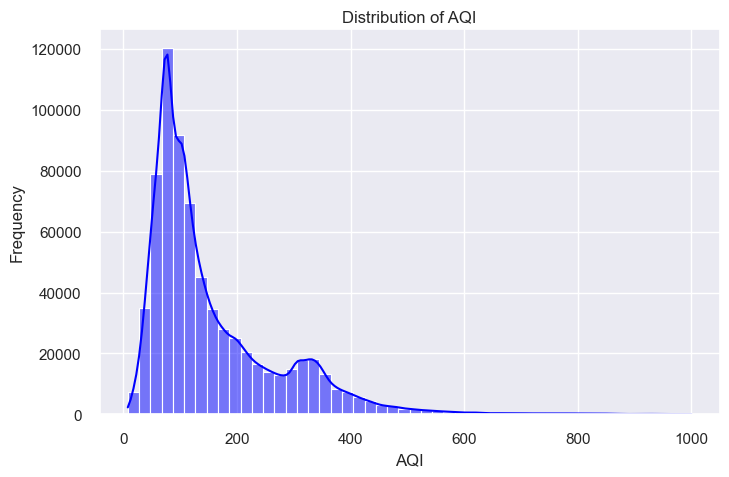

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], bins=50, kde=True, color="blue")
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

##### AQI Bucket Count

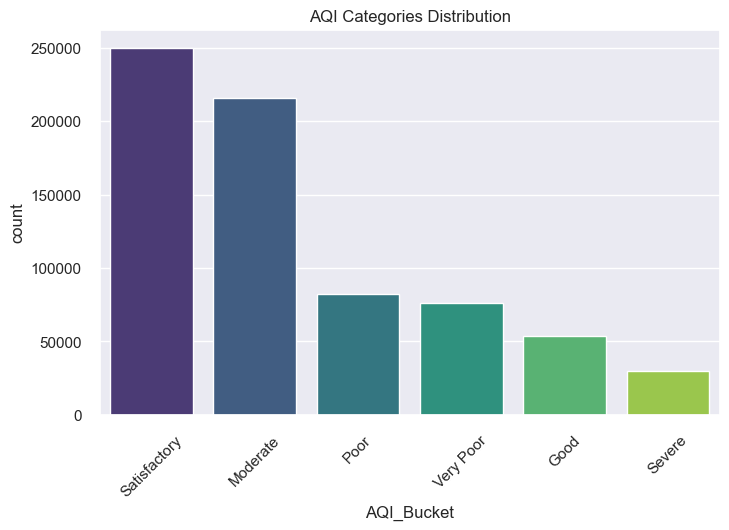

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x="AQI_Bucket", data=df, 
              order=df['AQI_Bucket'].value_counts().index, palette="viridis")
plt.title("AQI Categories Distribution")
plt.xticks(rotation=45)
plt.show()

##### City-wise Average AQI (top 15)

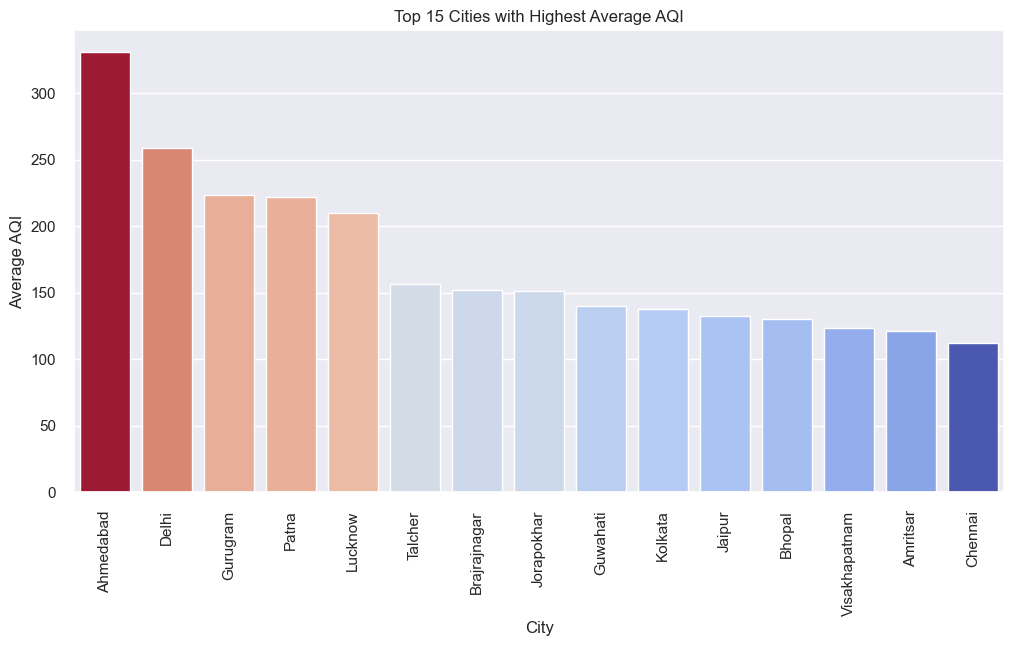

In [17]:
city_aqi = df.groupby("City")["AQI"].mean().sort_values(ascending=False).head(15)

norm = mpl.colors.PowerNorm(gamma=0.5, vmin=city_aqi.min(), vmax=city_aqi.max())
colors = plt.cm.coolwarm(norm(city_aqi.values))


plt.figure(figsize=(12,6))
sns.barplot(x=city_aqi.index, y=city_aqi.values, palette=colors)
plt.xticks(rotation=90)
plt.title("Top 15 Cities with Highest Average AQI")
plt.ylabel("Average AQI")
plt.show()

##### Trend Over Time (Delhi)

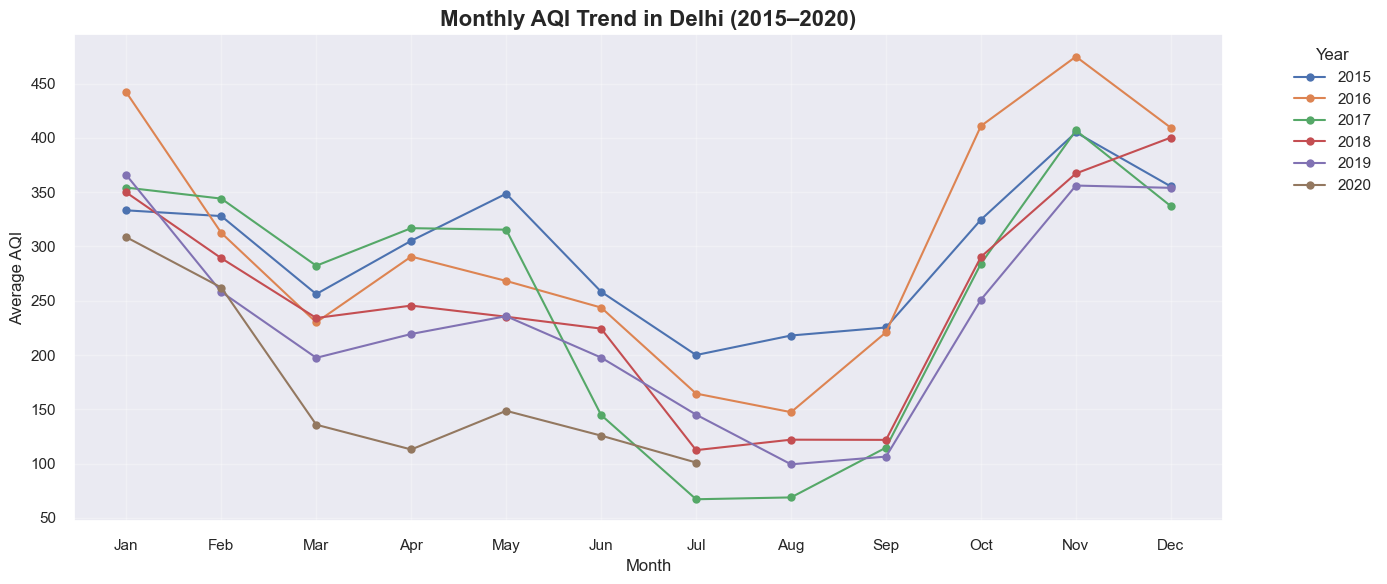

In [18]:
# Add Year & Month columns
delhi = df[df["City"] == "Delhi"].set_index("Datetime")

delhi['Year'] = delhi.index.year
delhi['Month'] = delhi.index.month

# Restrict to 2015–2020
delhi = delhi[(delhi['Year'] >= 2015) & (delhi['Year'] <= 2020)]

# Group by year & month
monthly_aqi = delhi.groupby(['Year','Month'])['AQI'].mean().unstack(0)

# Better month labels (Jan–Dec)
month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
monthly_aqi.index = month_names

# Plot with style
plt.figure(figsize=(14,6))
for year in monthly_aqi.columns:
    plt.plot(monthly_aqi.index, monthly_aqi[year], marker="o", label=str(year))

plt.title("Monthly AQI Trend in Delhi (2015–2020)", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average AQI", fontsize=12)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##### Correlation Heatmap

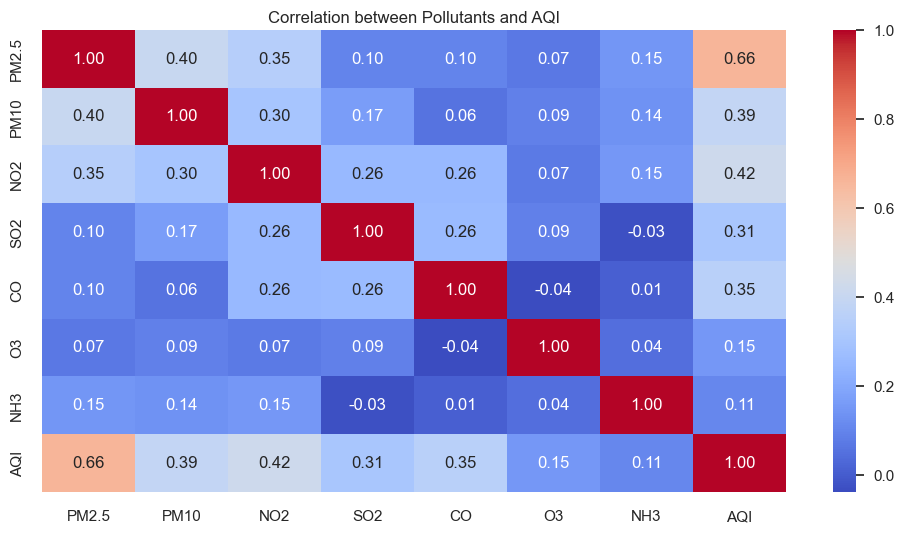

In [19]:
sns.heatmap(df[["PM2.5","PM10","NO2","SO2","CO","O3","NH3","AQI"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Pollutants and AQI")
plt.show()

##### Boxplot of Pollutants (After Cleaning Dataset)

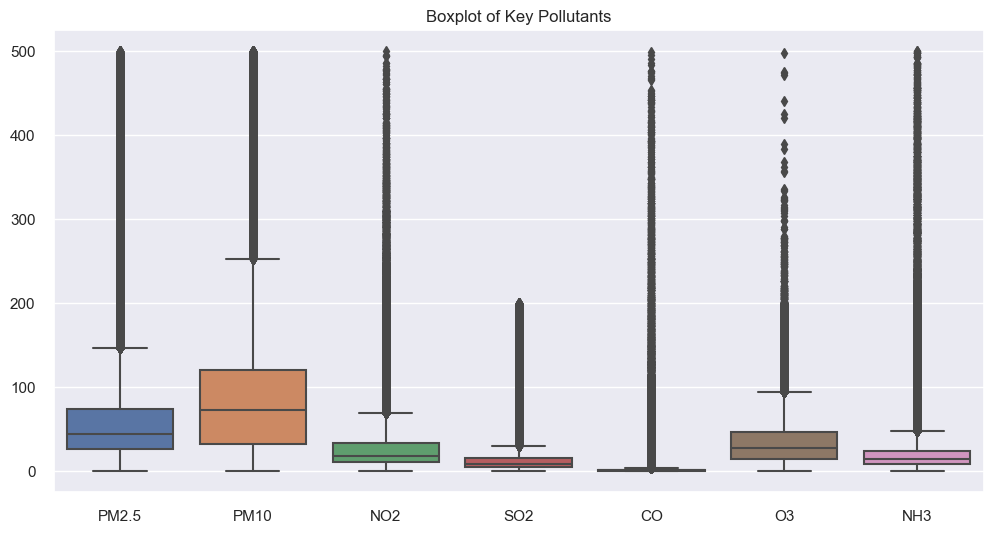

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["PM2.5","PM10","NO2","SO2","CO","O3","NH3"]])
plt.title("Boxplot of Key Pollutants")
plt.show()

# Week 2

In [21]:
# Import Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, confusion_matrix, classification_report
import joblib

##### Feature Engineering

In [22]:
# Copy dataset (df is your cleaned Week 1 dataset)
data = df.copy()

# Extract time-based features
data['Hour'] = data['Datetime'].dt.hour
data['Day'] = data['Datetime'].dt.day
data['Month'] = data['Datetime'].dt.month
data['Weekday'] = data['Datetime'].dt.weekday

# Lag features
data['AQI_lag1'] = data.groupby("City")['AQI'].shift(1)

# Rolling averages (3h)
for col in ["PM2.5","PM10","NO2","SO2","CO","O3"]:
    data[f"{col}_rolling3h"] = data.groupby("City")[col].transform(lambda x: x.rolling(3,1).mean())

# Drop rows with NaN (due to lag/rolling)
data = data.dropna().reset_index(drop=True)

# Encode City
le_city = LabelEncoder()
data['City_enc'] = le_city.fit_transform(data['City'])

print("Final dataset shape:", data.shape)
data.head()

Final dataset shape: (707849, 28)


,Datetime,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Month,Weekday,AQI_lag1,PM2.5_rolling3h,PM10_rolling3h,NO2_rolling3h,SO2_rolling3h,CO_rolling3h,O3_rolling3h,City_enc
0,2015-01-01 02:00:00,Ahmedabad,36.6,120.06,0.02,27.75,19.73,19.88,0.02,85.90,...,1,3,288.0,36.6,120.06,33.880000,103.985000,0.510000,153.580000,0
1,2015-01-01 03:00:00,Ahmedabad,36.6,120.06,0.08,19.32,11.08,19.88,0.08,52.83,...,1,3,288.0,36.6,120.06,29.026667,86.933333,0.366667,153.580000,0
2,2015-01-01 04:00:00,Ahmedabad,36.6,120.06,0.30,16.45,9.20,19.88,0.30,39.53,...,1,3,288.0,36.6,120.06,21.173333,59.420000,0.133333,153.580000,0
3,2015-01-01 05:00:00,Ahmedabad,36.6,120.06,0.12,14.90,7.85,19.88,0.12,32.63,...,1,3,288.0,36.6,120.06,16.890000,41.663333,0.166667,138.691667,0
4,2015-01-01 06:00:00,Ahmedabad,36.6,120.06,0.33,15.95,10.82,19.88,0.33,29.87,...,1,3,288.0,36.6,120.06,15.766667,34.010000,0.250000,108.915000,0


##### Train-Test Split

In [23]:
# Features and targets
feature_cols = [col for col in data.columns if col not in ['Datetime','City','AQI','AQI_Bucket']]
X = data[feature_cols]
y_reg = data['AQI']          # Regression target
y_clf = data['AQI_Bucket']   # Classification target

# Encode AQI_Bucket for classification
le_bucket = LabelEncoder()
y_clf = le_bucket.fit_transform(y_clf)

# Take 20% random sample of dataset for training/testing
sample_frac = 0.2
sampled_idx = np.random.choice(X.index, size=int(sample_frac*len(X)), replace=False)
X = X.loc[sampled_idx]
y_reg = y_reg.loc[sampled_idx]
y_clf = y_clf[sampled_idx]

print("Sampled dataset shape:", X.shape)

# Train-test split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, shuffle=False)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, shuffle=False)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Sampled dataset shape: (141569, 24)
Train size: (113255, 24) Test size: (28314, 24)


##### Baseline Models

##### (A) Regression Models

In [24]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_reg_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred_lr)))

# Random Forest Regressor (smaller config)
rf_reg = RandomForestRegressor(n_estimators=50, max_depth=12, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_reg_train)
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred_rf)))

# XGBoost Regressor (smaller config)
xgb_reg = XGBRegressor(n_estimators=80, learning_rate=0.1, max_depth=4, random_state=42, n_jobs=-1, verbosity=1)
xgb_reg.fit(X_train, y_reg_train)
y_pred_xgb = xgb_reg.predict(X_test)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred_xgb)))


Linear Regression RMSE: 17.82813030547838
Random Forest RMSE: 15.51107138072253
XGBoost RMSE: 15.240709263152883


##### (B) Classification Models

In [25]:
# Logistic Regression
log_clf = LogisticRegression(max_iter=200)
log_clf.fit(X_train, y_clf_train)
y_pred_log = log_clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_clf_test, y_pred_log))

# Random Forest Classifier (smaller config)
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=12, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_clf_train)
y_pred_rf_clf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_clf_test, y_pred_rf_clf))

# XGBoost Classifier (smaller config)
xgb_clf = XGBClassifier(n_estimators=80, learning_rate=0.1, max_depth=4, random_state=42, n_jobs=-1, verbosity=1)
xgb_clf.fit(X_train, y_clf_train)
y_pred_xgb_clf = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_clf_test, y_pred_xgb_clf))

c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6734124461397188
Random Forest Accuracy: 0.9478349932895388
XGBoost Accuracy: 0.9455039909585364


##### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV

##### Regression - Random Forest

In [27]:
# Param grid (smaller)
param_dist_rf = {
    "n_estimators": [50, 100],
    "max_depth": [6, 10],
    "min_samples_split": [2, 5]
}

rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search_rf = RandomizedSearchCV(
    rf_reg,
    param_distributions=param_dist_rf,
    n_iter=3,   # only 3 random combos
    cv=2,       # fewer folds
    scoring="neg_mean_squared_error",
    verbose=1,
    random_state=42
)

random_search_rf.fit(X_train, y_reg_train)
best_rf_reg = random_search_rf.best_estimator_
print("Best RF Params:", random_search_rf.best_params_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best RF Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}


##### Classification - XGBoost

In [28]:
# Param grid (smaller)
param_dist_xgb = {
    "n_estimators": [50, 80],
    "max_depth": [3, 4],
    "learning_rate": [0.05, 0.1]
}

xgb_clf = XGBClassifier(random_state=42, n_jobs=-1, verbosity=1)

random_search_xgb = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=3,   # only 3 random combos
    cv=2,       # fewer folds
    scoring="accuracy",
    verbose=1,
    random_state=42
)

random_search_xgb.fit(X_train, y_clf_train)
best_xgb_clf = random_search_xgb.best_estimator_
print("Best XGB Params:", random_search_xgb.best_params_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best XGB Params: {'n_estimators': 80, 'max_depth': 3, 'learning_rate': 0.1}


##### Save Best Models

In [29]:
joblib.dump(rf_reg, "best_rf_regressor.pkl")
joblib.dump(xgb_clf, "best_xgb_classifier.pkl")
joblib.dump(le_city, "city_encoder.pkl")
joblib.dump(le_bucket, "aqi_bucket_encoder.pkl")

print("✅ Models & encoders saved successfully!")

✅ Models & encoders saved successfully!


# Visual Evaluation Tools

##### Regression - Residual Plot

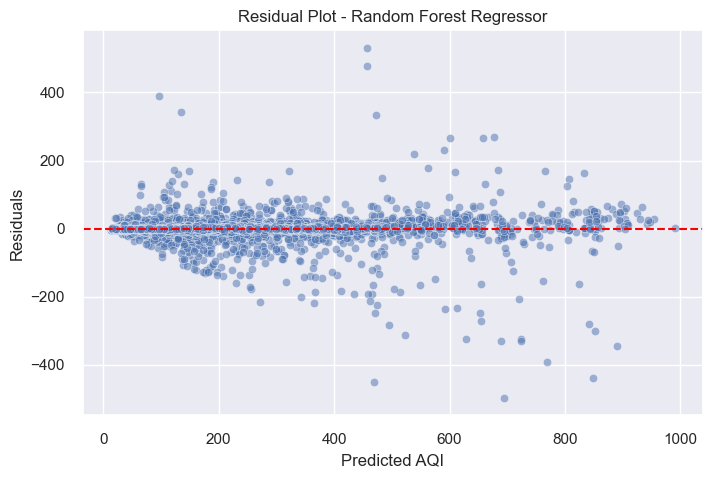

In [30]:
# Residuals for RF
y_pred_rf = best_rf_reg.predict(X_test)
residuals = y_reg_test - y_pred_rf

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest Regressor")
plt.show()

##### Classification - Confusion Matrix

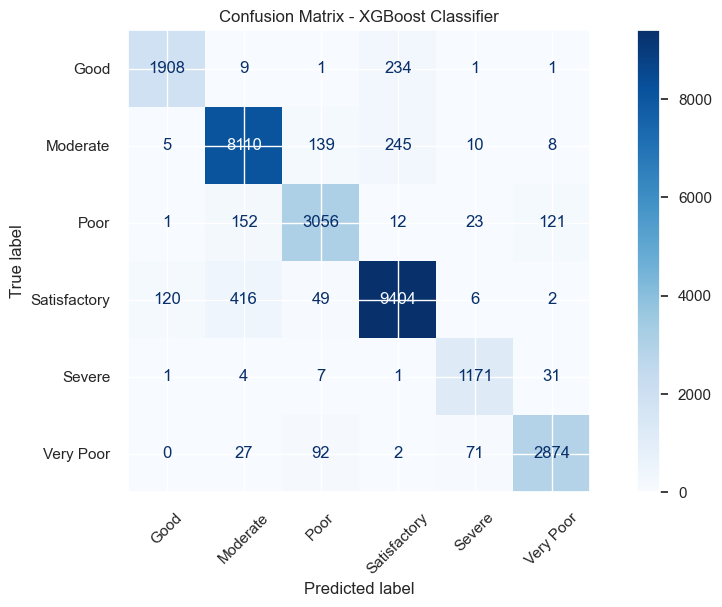

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_xgb = best_xgb_clf.predict(X_test)
cm = confusion_matrix(y_clf_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_bucket.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

##### Feature Importance - Random Forest & XGBoost

In [32]:
from xgboost import plot_importance

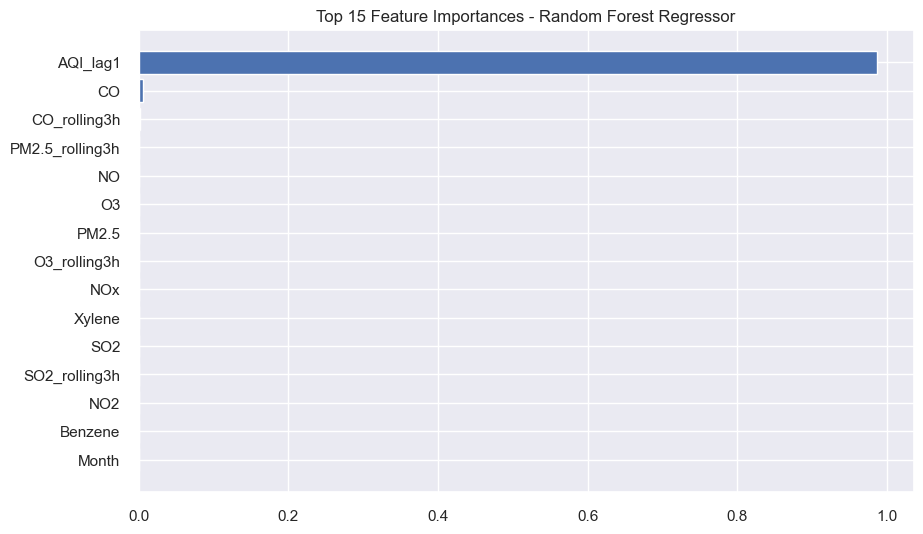

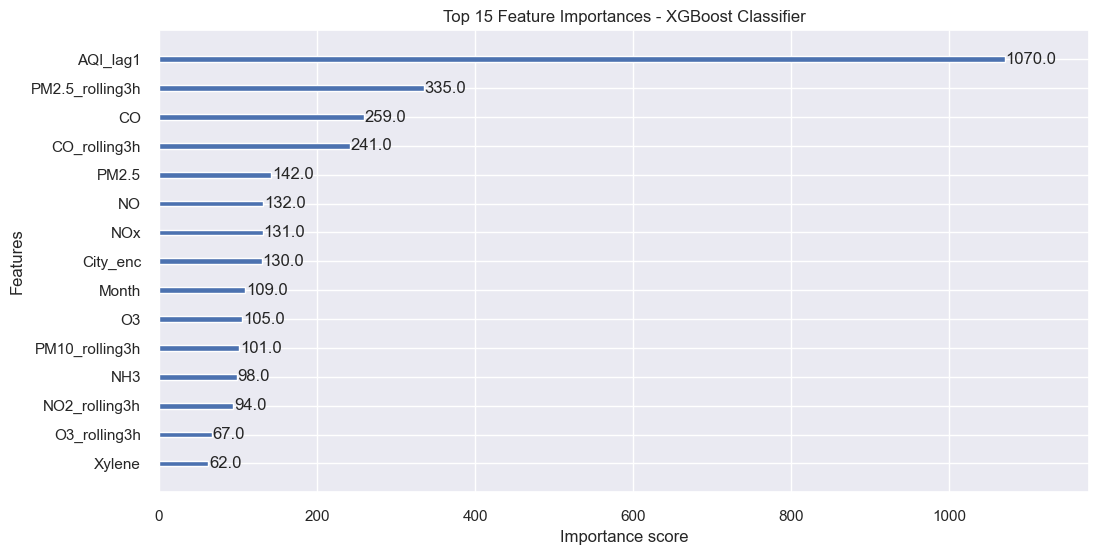

In [33]:
# Random Forest Feature Importance
importances = best_rf_reg.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title("Top 15 Feature Importances - Random Forest Regressor")
plt.show()

# XGBoost Feature Importance
plot_importance(best_xgb_clf, max_num_features=15, importance_type="weight")
plt.title("Top 15 Feature Importances - XGBoost Classifier")
plt.show()